In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("apoorvaappz/global-super-store-dataset")

print("Path to dataset files:",path)

c:\ProgramData\miniconda3\envs\myenvironment\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Administrator\.cache\kagglehub\datasets\apoorvaappz\global-super-store-dataset\versions\2


In [3]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
df = pd.read_csv(os.path.join(path, "Global_Superstore2.csv"), encoding='latin1')

In [5]:
df.shape

(51290, 24)

In [6]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
df.drop("Postal Code",axis=1,inplace=True)

df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [8]:
# converting object to datetime

df["Order Date"]=pd.to_datetime(df["Order Date"])
df["Ship Date"]=pd.to_datetime(df["Ship Date"])


# creating new features

df["order year"]=df["Order Date"].dt.year
df["order_month"]=df["Order Date"].dt.month
df["ship year"]=df["Ship Date"].dt.year
df["ship_month"]=df["Ship Date"].dt.month


# unit price

df["unit_price"]=df["Sales"]/df["Quantity"]


# rename columns (standardization)

df.rename(columns={"Order Date":"order_date","Ship Date":"ship_date","Order Priority":"order_priority","order year":"order_year","ship year":"ship_year"},inplace=True)


# check the time period of dataset

print("Min Date: {}".format(df["order_date"].min()))

Min Date: 2011-01-01 00:00:00


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13944\3873349661.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Order Date"]=pd.to_datetime(df["Order Date"])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13944\3873349661.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Ship Date"]=pd.to_datetime(df["Ship Date"])


In [9]:
df.describe()

,Row ID,order_date,ship_date,Sales,Quantity,Discount,Profit,Shipping Cost,order_year,order_month,ship_year,ship_month,unit_price
count,51290.00000,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208,7.522636,2012.792728,7.463853,71.657487
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,1.000000,2011.000000,1.000000,0.336000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,5.000000,2012.000000,5.000000,11.799900
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,8.000000,2013.000000,8.000000,29.400000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,10.000000,2014.000000,10.000000,82.160000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,12.000000,2015.000000,12.000000,3773.080000
std,14806.29199,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931,3.300056,1.105303,3.346124,113.581515


In [10]:
df.dtypes

Row ID                     int64
Order ID                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
order_priority            object
order_year                 int32
order_month                int32
ship_year                  int32
ship_month                 int32
unit_price               float64
dtype: object

In [11]:
pd.set_option('display.max_columns', None)
df.head(3)

,Row ID,Order ID,order_date,ship_date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,order_priority,order_year,order_month,ship_year,ship_month,unit_price
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,2012,7,329.950
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,2013,2,412.155
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10,2013,10,575.019


## EDA

1. Shipmode uses standard class to account for the bulk (more than 50%), followed by: Second class, first class, same day. (it is speculated that there is a difference in the priority and urgency of shipping)
2. Segment is dominated by: Consumer, followed by Corporate, Home Office
3. Market sorted by order quantity from high to low: APAC, LATAM, US, EU, EMEA, Africa
4. order_priority includes: critical, high, medium, and low, with medium accounting for the largest number.


## EDA - Overall
* Shipmode first class critical

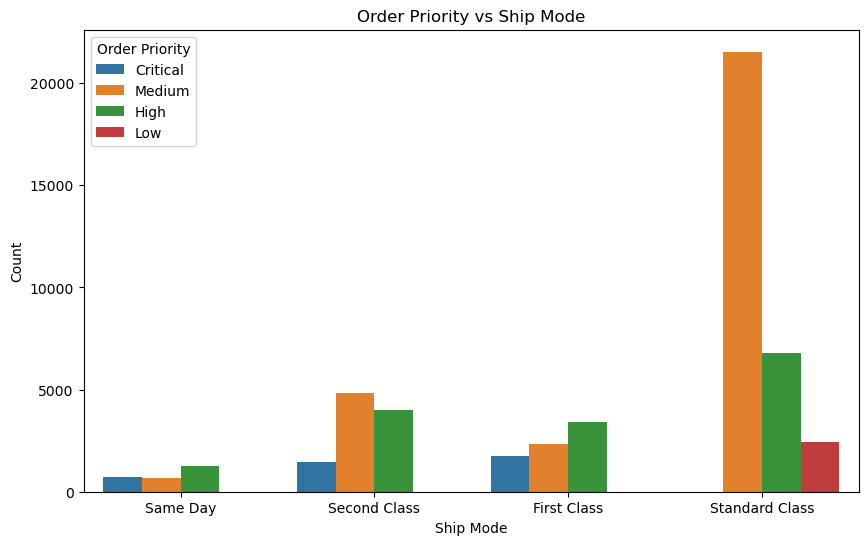

In [12]:
# 1. Relationship Between Order Priority & Shipping Mode
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ship Mode', hue='order_priority')
plt.title('Order Priority vs Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.legend(title='Order Priority')
plt.show()

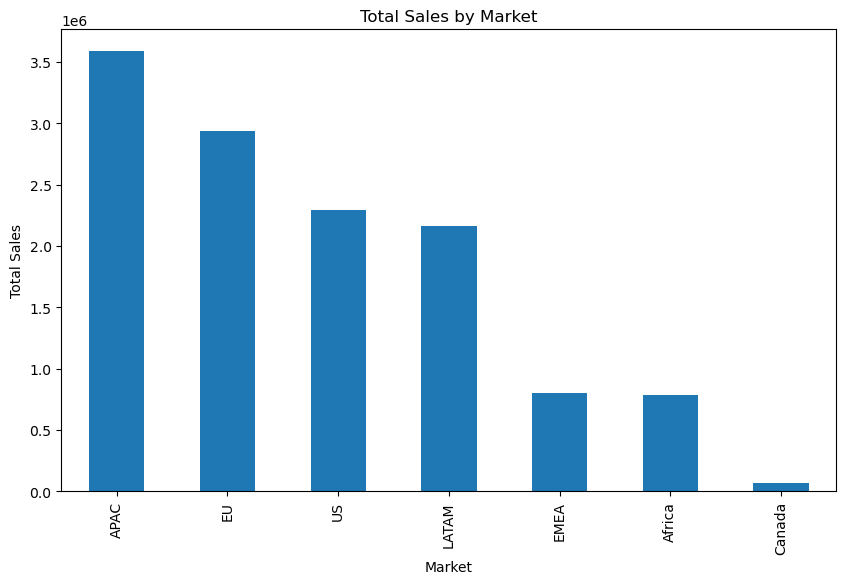

In [13]:
# 2. Relationship Between Market & Sales
market_sales = df.groupby('Market')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
market_sales.plot(kind='bar')
plt.title('Total Sales by Market')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.show()


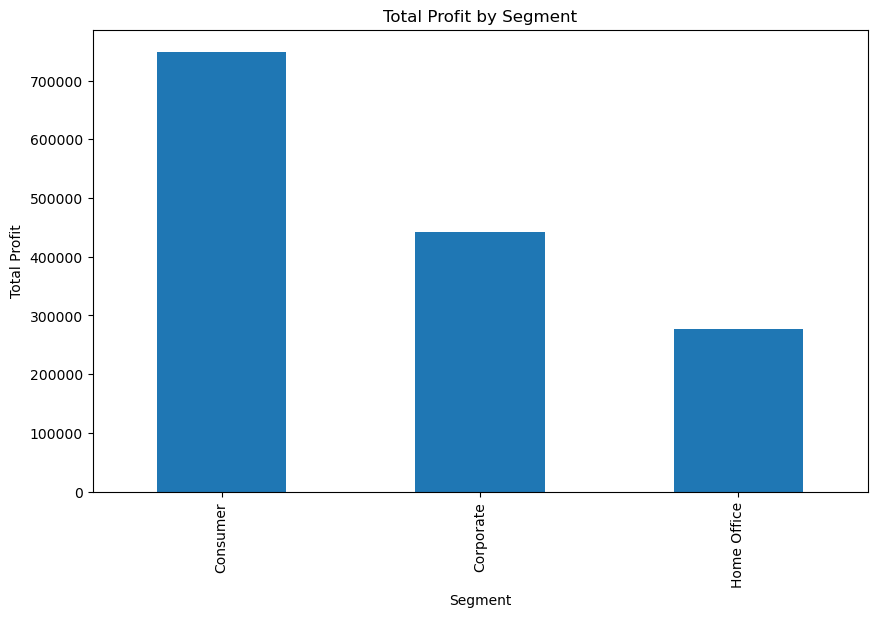

In [14]:
# 3. Relationship Between Customer Segmentation & Profit
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
segment_profit.plot(kind='bar')
plt.title('Total Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.show()


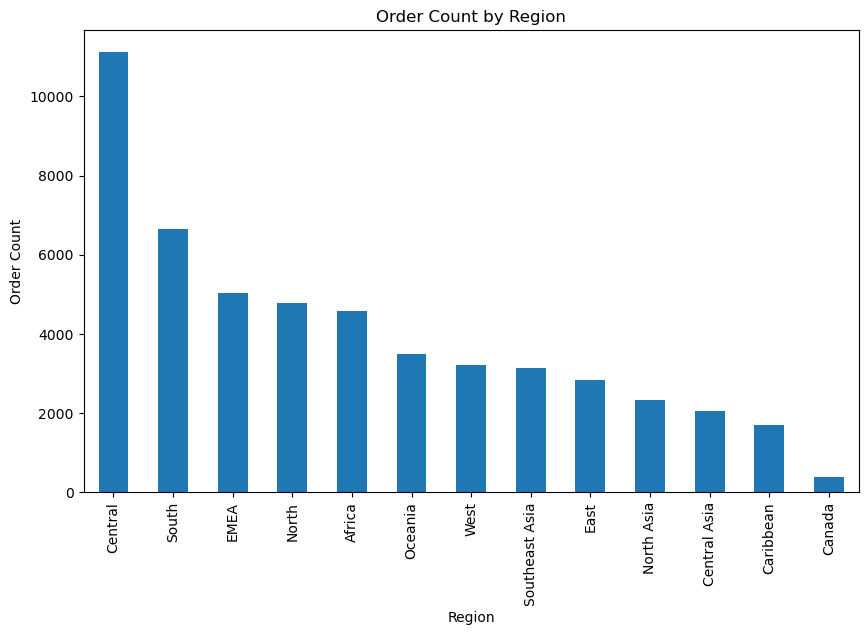

In [15]:
# 4. Relationship Between Region & Order Count
region_order_count = df['Region'].value_counts()
plt.figure(figsize=(10, 6))
region_order_count.plot(kind='bar')
plt.title('Order Count by Region')
plt.xlabel('Region')
plt.ylabel('Order Count')
plt.show()

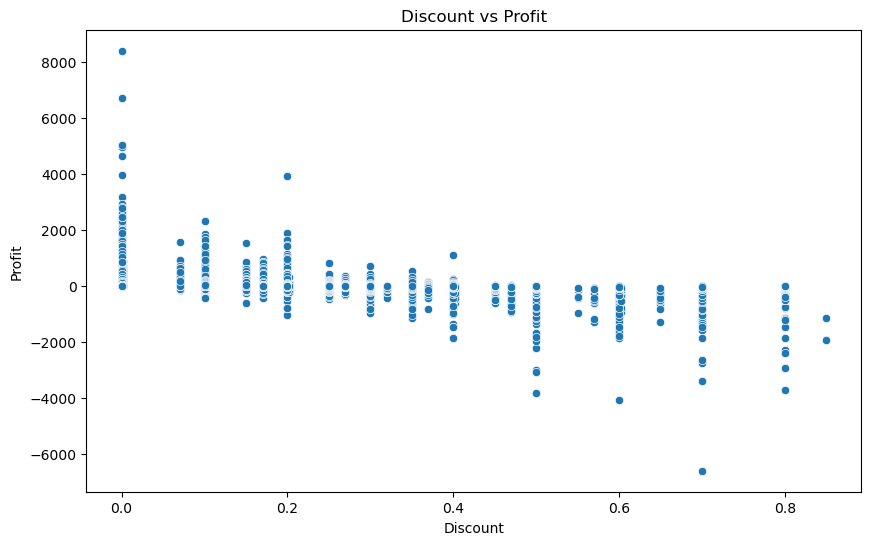

In [16]:
# 5. Relationship Between Discounts & Profits
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

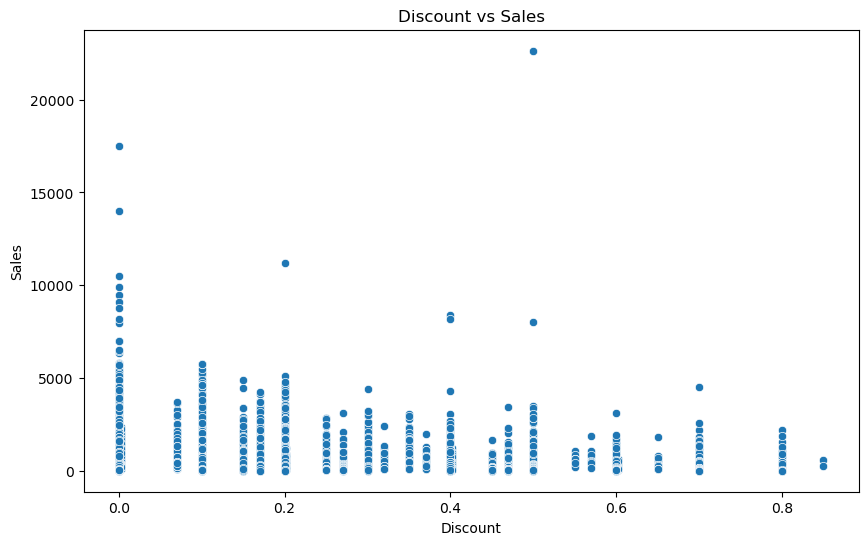

In [17]:
# Relationship Between Discounts & Sales Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Sales')
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

In [18]:
# Selecting the specified discount value
discount_values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
df_filtered = df[df['Discount'].isin(discount_values)]

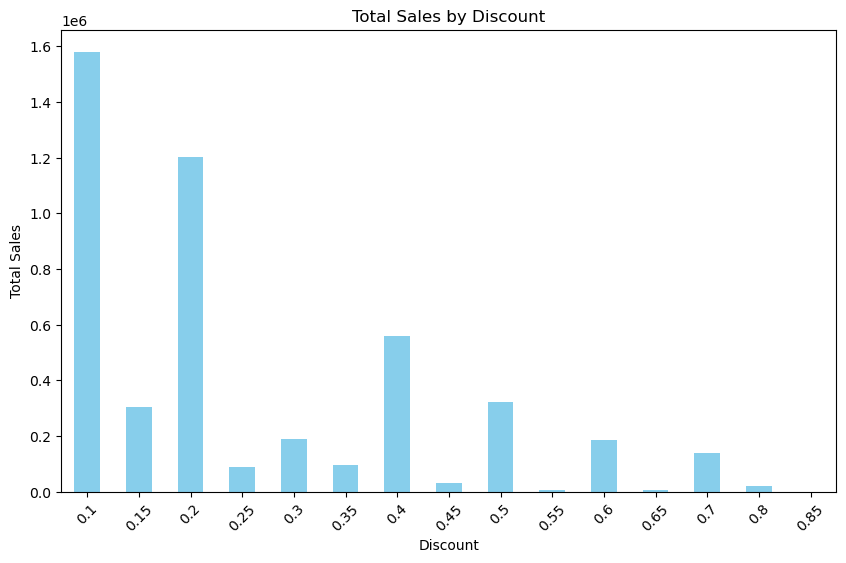

In [19]:
# 1. Relationship Between Discounts & Sales
discount_sales = df_filtered.groupby('Discount')['Sales'].sum()
plt.figure(figsize=(10, 6))
discount_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Discount')
plt.xlabel('Discount')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

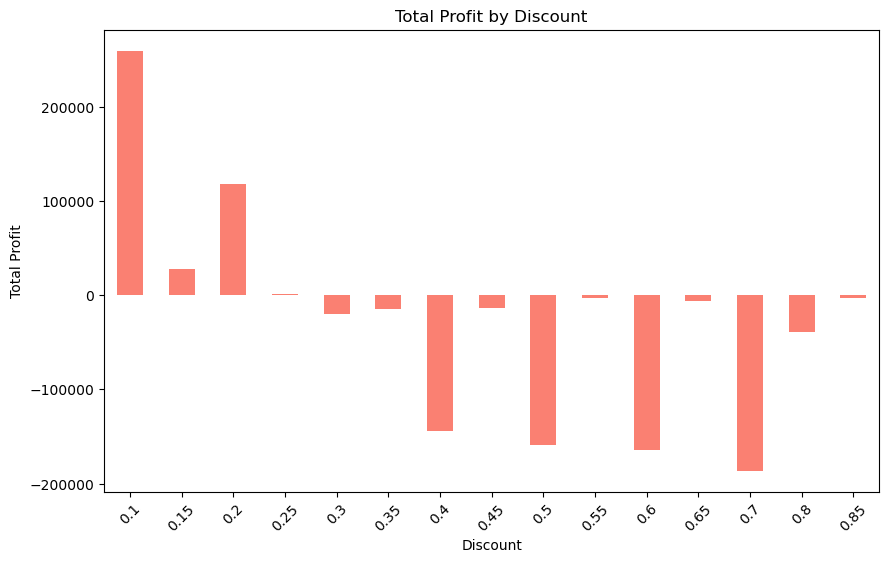

In [20]:
# 2. Relationship Between Discounts & Profit
discount_profit = df_filtered.groupby('Discount')['Profit'].sum()
plt.figure(figsize=(10, 6))
discount_profit.plot(kind='bar', color='salmon')
plt.title('Total Profit by Discount')
plt.xlabel('Discount')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

## EDA - Losing trade analysis (compared to the overall data set)
The following fields are irrelevant to whether the trade is loss-making:
> Segment, Order Priority, Time
* The general price distribution of loss-making transactions is generally low, and the discount ratio is higher than the overall price distribution.
* The proportion of loss-making transactions in the EU and US markets is relatively low

In [21]:
df.columns

Index(['Row ID', 'Order ID', 'order_date', 'ship_date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'order_priority', 'order_year', 'order_month',
       'ship_year', 'ship_month', 'unit_price'],
      dtype='object')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13944\2774488145.py:14: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.barplot(x=negative_segment_ratio.index, y=negative_segment_ratio.values, ax=axes[0, 0], palette=colors)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13944\2774488145.py:18: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.barplot(x=overall_segment_ratio.index, y=overall_segment_ratio.values, ax=axes[0, 1], palette=colors)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13944\2774488145.py:26: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  sns.barplot(x=negative_market_ratio.index, y=negative_market_ratio.values, ax=axes[1, 0], palette=colors)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13944\2774488145.py:30: UserWarning: The palette list has more values (9) than needed (7), which may not be inte

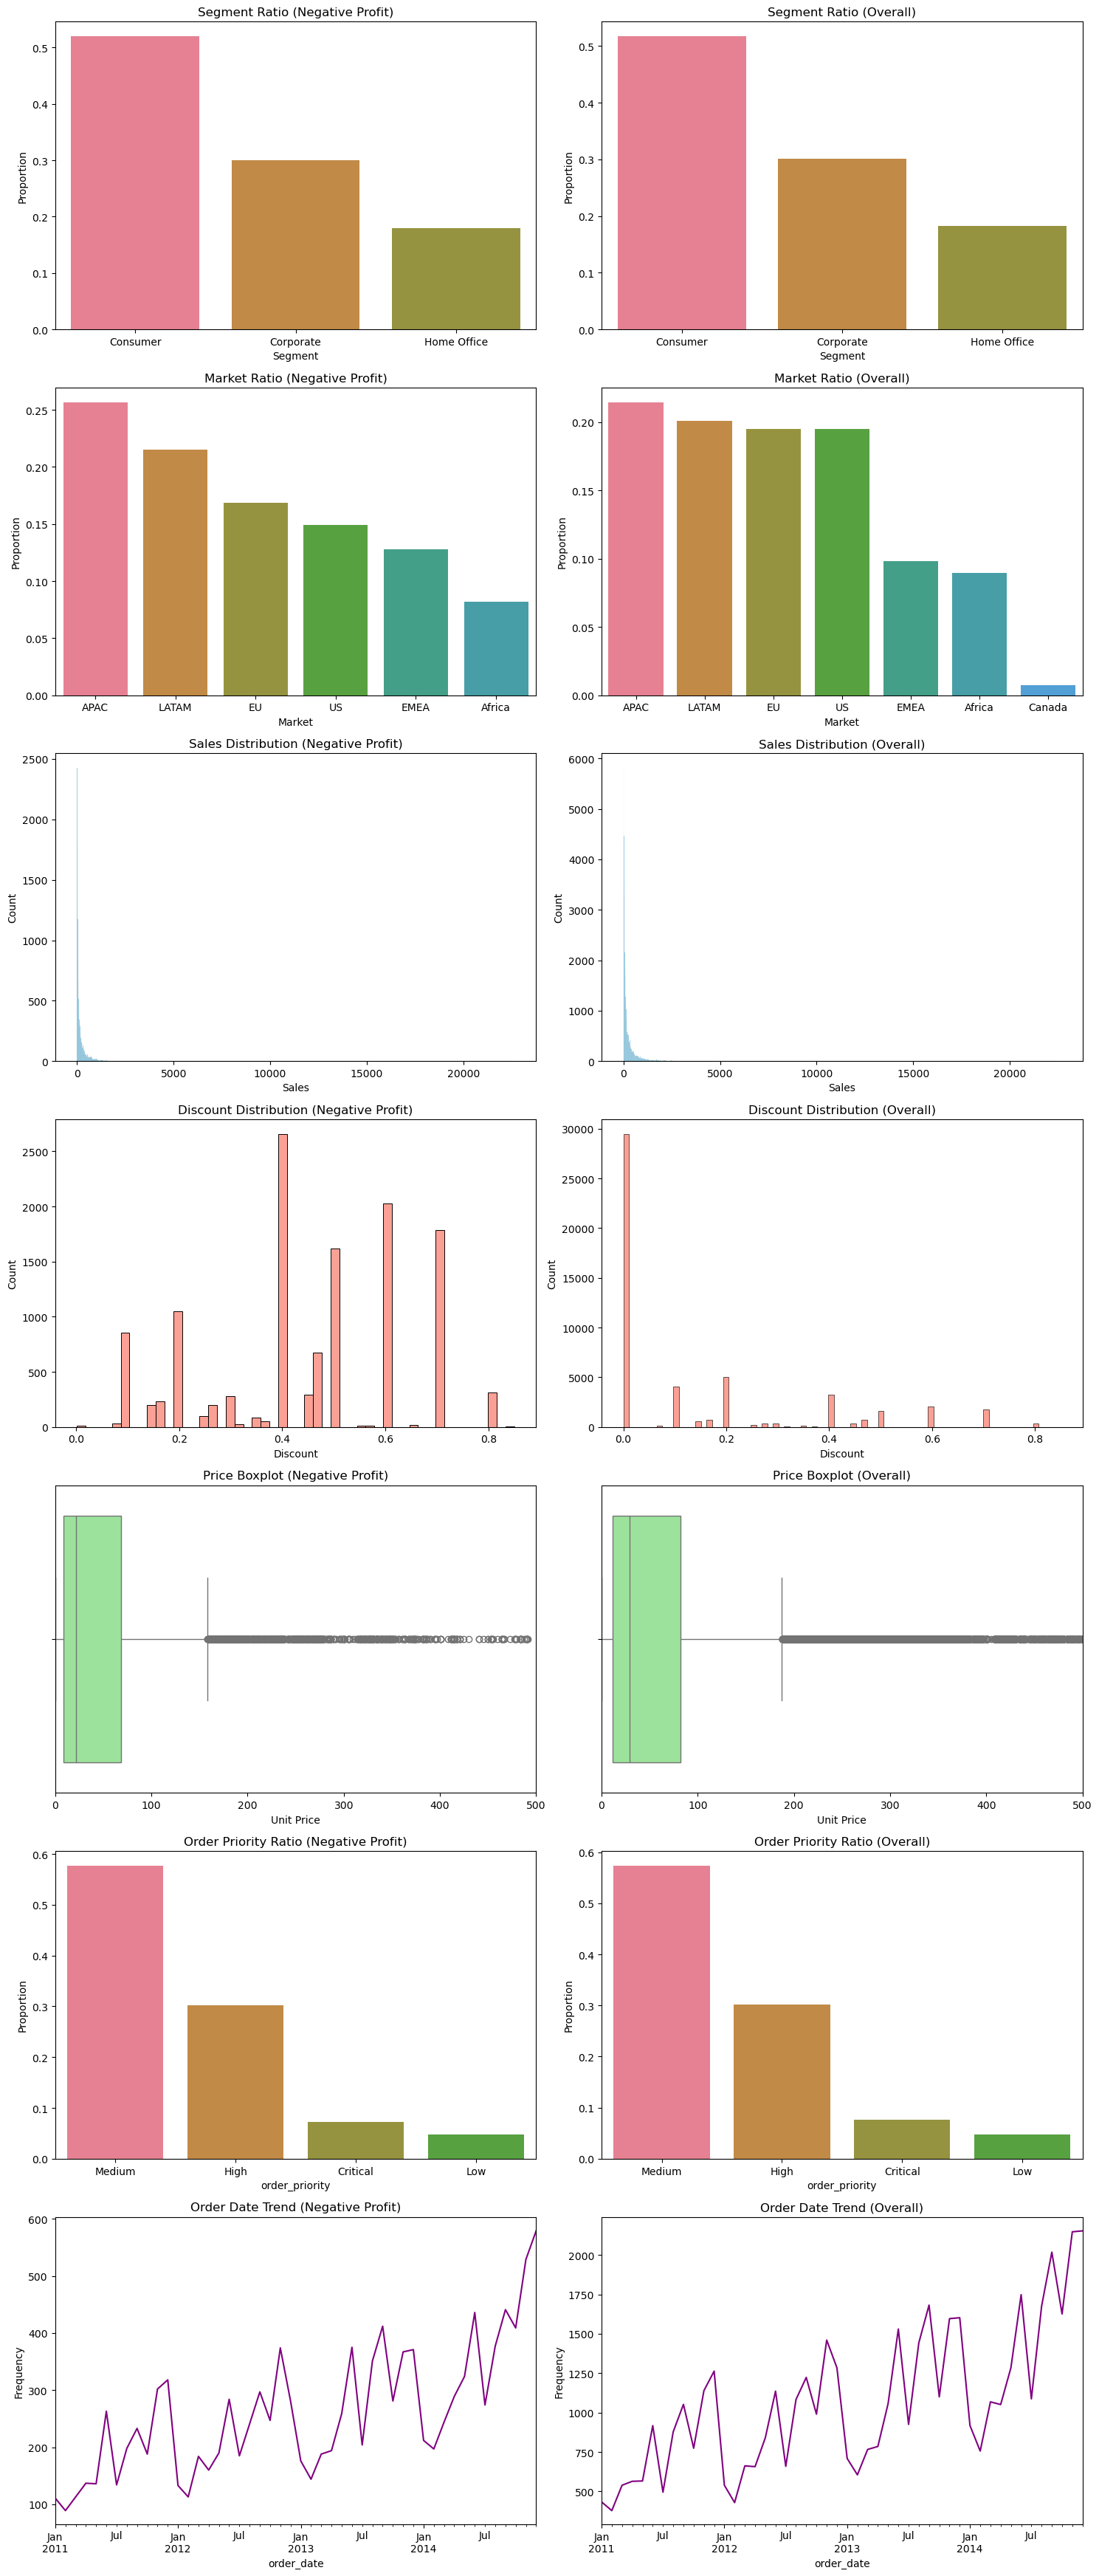

In [22]:
# Filtering out values with profit less than 0
df_negative_profit = df[df['Profit'] < 0]

# Set graph size and subgraph layout
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 35))

# Seting color
colors = sns.color_palette("husl", 9)

# 1. Segment ratio
negative_segment_ratio = df_negative_profit['Segment'].value_counts(normalize=True)
overall_segment_ratio = df['Segment'].value_counts(normalize=True)

sns.barplot(x=negative_segment_ratio.index, y=negative_segment_ratio.values, ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('Segment Ratio (Negative Profit)')
axes[0, 0].set_ylabel('Proportion')

sns.barplot(x=overall_segment_ratio.index, y=overall_segment_ratio.values, ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('Segment Ratio (Overall)')
axes[0, 1].set_ylabel('Proportion')

# 2. Market ratio
negative_market_ratio = df_negative_profit['Market'].value_counts(normalize=True)
overall_market_ratio = df['Market'].value_counts(normalize=True)

sns.barplot(x=negative_market_ratio.index, y=negative_market_ratio.values, ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('Market Ratio (Negative Profit)')
axes[1, 0].set_ylabel('Proportion')

sns.barplot(x=overall_market_ratio.index, y=overall_market_ratio.values, ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('Market Ratio (Overall)')
axes[1, 1].set_ylabel('Proportion')

# 3. Sales distribution
sns.histplot(df_negative_profit['Sales'], ax=axes[2, 0], color='skyblue')
axes[2, 0].set_title('Sales Distribution (Negative Profit)')
axes[2, 0].set_xlabel('Sales')

sns.histplot(df['Sales'], ax=axes[2, 1], color='skyblue')
axes[2, 1].set_title('Sales Distribution (Overall)')
axes[2, 1].set_xlabel('Sales')

# 4. Discount distribution
sns.histplot(df_negative_profit['Discount'], ax=axes[3, 0], color='salmon')
axes[3, 0].set_title('Discount Distribution (Negative Profit)')
axes[3, 0].set_xlabel('Discount')

sns.histplot(df['Discount'], ax=axes[3, 1], color='salmon')
axes[3, 1].set_title('Discount Distribution (Overall)')
axes[3, 1].set_xlabel('Discount')

# 5. Price box plot distribution
sns.boxplot(data=df_negative_profit, x='unit_price', ax=axes[4, 0], color='lightgreen')
axes[4, 0].set_title('Price Boxplot (Negative Profit)')
axes[4, 0].set_xlabel('Unit Price')
axes[4, 0].set_xlim(0, 500)

sns.boxplot(data=df, x='unit_price', ax=axes[4, 1], color='lightgreen')
axes[4, 1].set_title('Price Boxplot (Overall)')
axes[4, 1].set_xlabel('Unit Price')
axes[4, 1].set_xlim(0, 500)

# 6. Order Priority Distribution
negative_priority_ratio = df_negative_profit['order_priority'].value_counts(normalize=True)
overall_priority_ratio = df['order_priority'].value_counts(normalize=True)

sns.barplot(x=negative_priority_ratio.index, y=negative_priority_ratio.values, ax=axes[5, 0], palette=colors)
axes[5, 0].set_title('Order Priority Ratio (Negative Profit)')
axes[5, 0].set_ylabel('Proportion')

sns.barplot(x=overall_priority_ratio.index, y=overall_priority_ratio.values, ax=axes[5, 1], palette=colors)
axes[5, 1].set_title('Order Priority Ratio (Overall)')
axes[5, 1].set_ylabel('Proportion')

# 7. Time trend according to order_date
df_negative_profit['order_date'] = pd.to_datetime(df_negative_profit['order_date'])
df['order_date'] = pd.to_datetime(df['order_date'])

negative_order_trend = df_negative_profit['order_date'].dt.to_period('M').value_counts().sort_index()
overall_order_trend = df['order_date'].dt.to_period('M').value_counts().sort_index()

negative_order_trend.plot(ax=axes[6, 0], color='purple')
axes[6, 0].set_title('Order Date Trend (Negative Profit)')
axes[6, 0].set_ylabel('Frequency')

overall_order_trend.plot(ax=axes[6, 1], color='purple')
axes[6, 1].set_title('Order Date Trend (Overall)')
axes[6, 1].set_ylabel('Frequency')

# #Adjust sub-picture layout
plt.tight_layout()
plt.show()


## Hypo: EU and US Consumer is the critical segment we want to value
* we can satisfy their need, that it, we have a unique competitive advantage over other competitors >> Customer ID transaction frequency analysis
* Sales proportion and growth potential of each segment (sales trend)
 * Consumer accounts for the highest sales of the company, and market data is unavailable. Let us first assume that its market size is the largest, and the EU + US market also accounts for 43.08% of the Consumer Segment, which is large enough.
 * Consumer market has the highest growth potential (the largest growth rate from the earliest sales to the latest)
 * Among EU & US transactions, loss-making transactions account for a relatively small proportion
* Consumer brings the highest profit to the company (from the profit column)

In [23]:
# Consumer ID Transaction Frequency Analysis

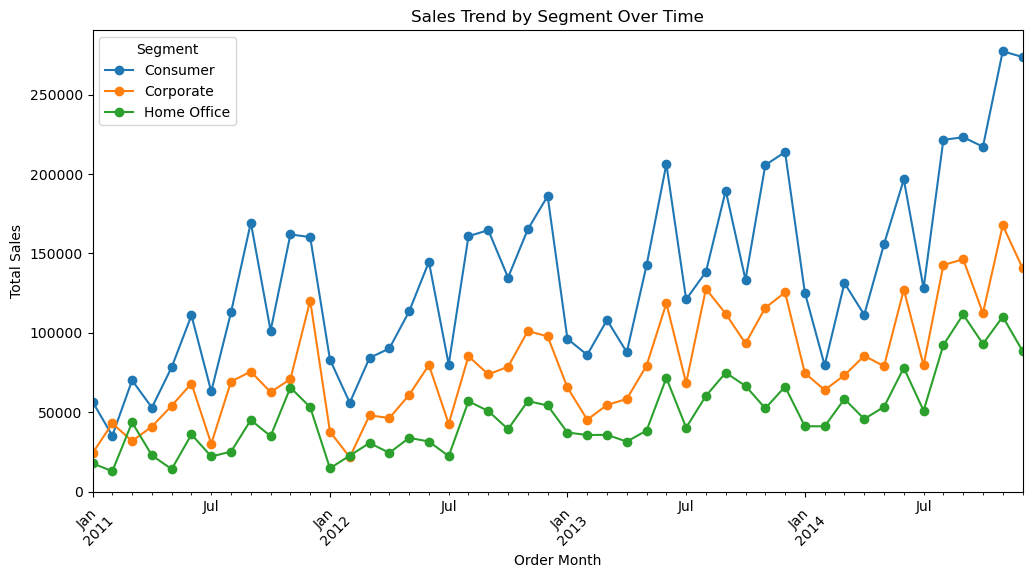

In [24]:
# Argument 2. The trend of Sales over time brought by each Segment
# Consumer accounts for the highest proportion, and the growth rate from the earliest sales to the latest sales is also the highest.
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate the total profit of each segment in each month
segment_profit_trend = df.groupby(['order_month', 'Segment'])['Sales'].sum().unstack()

# Draw the profit trend chart of each Segment
plt.figure(figsize=(12, 6))
segment_profit_trend.plot(ax=plt.gca(), marker='o')
plt.title('Sales Trend by Segment Over Time')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.legend(title='Segment')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Arugment 2: The market of EU & US is big enough
df2 = df[df['Segment'] == 'Consumer'].groupby('Market').agg({'Sales':'sum', 'Profit':'sum'}).sort_values('Sales' , ascending=False)
df2['Sales_Proportion'] = df2['Profit'] / df2['Profit'].sum()
df2


,Sales,Profit,Sales_Proportion
Market,,,
APAC,1.816754e+06,222817.56040,0.297392
EU,1.529716e+06,188687.70750,0.251839
US,1.161401e+06,134119.20920,0.179007
LATAM,1.133847e+06,120632.93196,0.161007
Africa,4.237668e+05,47772.09900,0.063761
EMEA,4.067452e+05,25532.57400,0.034078
Canada,3.571911e+04,9677.70000,0.012917


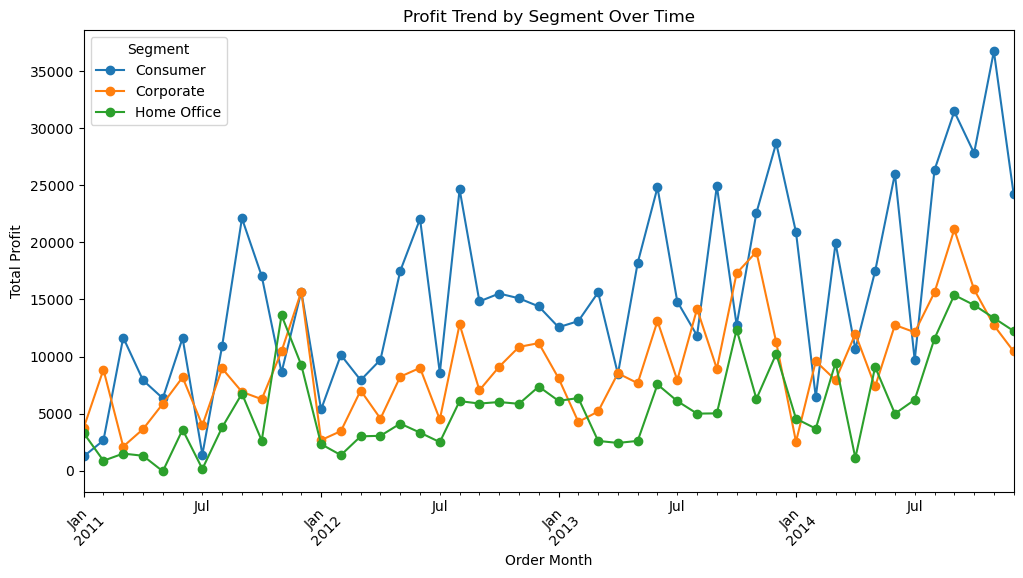

In [26]:
# Argument 3. The trend of profits brought by each segment over time.
# Consumer brings the highest profit to the company (from the profit column)

df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate the total profit of each segment in each month
segment_profit_trend = df.groupby(['order_month', 'Segment'])['Profit'].sum().unstack()

# Draw the profit trend chart of each Segment
plt.figure(figsize=(12, 6))
segment_profit_trend.plot(ax=plt.gca(), marker='o')
plt.title('Profit Trend by Segment Over Time')
plt.xlabel('Order Month')
plt.ylabel('Total Profit')
plt.legend(title='Segment')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Argument 1: There is currently no valid comparison baseline
# Filter out transaction data whose Segment is consumer and Market is EU or US
df_filtered = df[(df['Segment'] == 'Consumer') & (df['Market'].isin(['EU', 'US']))]

# Calculate the number of purchases per customer
customer_purchase_frequency = df_filtered['Customer ID'].value_counts()

# Calculate the purchase interval for each customer
df_filtered['order_date'] = pd.to_datetime(df_filtered['order_date'])
customer_purchase_intervals = df_filtered.groupby('Customer ID')['order_date'].apply(lambda x: x.sort_values().diff().mean())

# Calculate the total purchase value (CLV) of each customer
customer_lifetime_value = df_filtered.groupby('Customer ID')['Sales'].sum()

# Calculate average order value (AOV) per customer
average_order_value = df_filtered.groupby('Customer ID')['Sales'].mean()

# Calculate the duration of each customer
customer_duration = df_filtered.groupby('Customer ID')['order_date'].apply(lambda x: x.max() - x.min())

# Combine all indicators into one data frame
customer_metrics = pd.DataFrame({
    'Purchase Frequency': customer_purchase_frequency,
    'Average Purchase Interval': customer_purchase_intervals,
    'Customer Lifetime Value': customer_lifetime_value,
    'Average Order Value': average_order_value,
    'Customer Duration': customer_duration
})

# Display the first few rows of data
customer_metrics.sort_values('Customer Lifetime Value', ascending=False).head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13944\2921139863.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order_date'] = pd.to_datetime(df_filtered['order_date'])


,Purchase Frequency,Average Purchase Interval,Customer Lifetime Value,Average Order Value,Customer Duration
Customer ID,,,,,
GT-14710,41,32 days 01:12:00,23249.628,567.064098,1282 days
SE-20110,41,33 days 18:36:00,21588.977,526.560415,1351 days
SC-20095,39,34 days 17:41:03.157894737,21443.521,549.833872,1320 days
SP-20920,44,25 days 01:06:58.604651162,20554.832,467.155273,1077 days
ZC-21910,58,20 days 21:53:41.052631579,19878.776,342.737517,1192 days


In [28]:
# for comparison
df_filtered = df[df['Segment'] != 'Consumer']

# Calculate the number of purchases per customer
customer_purchase_frequency = df_filtered['Customer ID'].value_counts()

# Calculate the purchase interval for each customer
df_filtered['order_date'] = pd.to_datetime(df_filtered['order_date'])
customer_purchase_intervals = df_filtered.groupby('Customer ID')['order_date'].apply(lambda x: x.sort_values().diff().mean())

# Calculate total purchase value per customer (CLV)
customer_lifetime_value = df_filtered.groupby('Customer ID')['Sales'].sum()

# Calculate average order value (AOV) per customer
average_order_value = df_filtered.groupby('Customer ID')['Sales'].mean()

# Calculate the duration of each customer
customer_duration = df_filtered.groupby('Customer ID')['order_date'].apply(lambda x: x.max() - x.min())

# Combine all indicators into one data frame
customer_metrics2 = pd.DataFrame({
 'Purchase Frequency': customer_purchase_frequency,
 'Average Purchase Interval': customer_purchase_intervals,
 'Customer Lifetime Value': customer_lifetime_value,
 'Average Order Value': average_order_value,
 'Customer Duration': customer_duration
})

#First few rows of data
customer_metrics2.sort_values('Purchase Frequency', ascending=False).head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13944\1740587266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order_date'] = pd.to_datetime(df_filtered['order_date'])


,Purchase Frequency,Average Purchase Interval,Customer Lifetime Value,Average Order Value,Customer Duration
Customer ID,,,,,
BE-11335,94,14 days 05:25:09.677419354,27158.01840,288.915089,1323 days
JG-15805,90,15 days 08:21:34.382022472,22015.38620,244.615402,1366 days
SW-20755,89,14 days 16:38:10.909090909,23321.58000,262.040225,1293 days
MY-18295,85,17 days 05:25:42.857142857,25570.49418,300.829343,1447 days
MP-17965,84,17 days 00:17:20.963855421,17228.49770,205.101163,1412 days
